<a href="https://www.kaggle.com/code/mazensafty/california-house-price-prediction?scriptVersionId=198144888" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# California House Price Prediction

# Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler , MinMaxScaler
%matplotlib inline

# Data Exploration (EDA)

In [2]:
house_data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
print(house_data.shape)
house_data.head(10)

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
house_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15402,-117.22,33.22,15.0,1430.0,343.0,704.0,322.0,1.9571,162500.0,<1H OCEAN
7980,-118.17,33.87,48.0,2258.0,509.0,1395.0,492.0,3.7650,164800.0,<1H OCEAN
4135,-118.18,34.13,52.0,2228.0,475.0,1311.0,452.0,3.5341,182100.0,<1H OCEAN
18920,-122.19,38.07,20.0,3000.0,525.0,1207.0,491.0,4.6406,217500.0,NEAR BAY
6437,-118.02,34.10,36.0,1928.0,361.0,1008.0,368.0,4.7330,233700.0,INLAND


In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


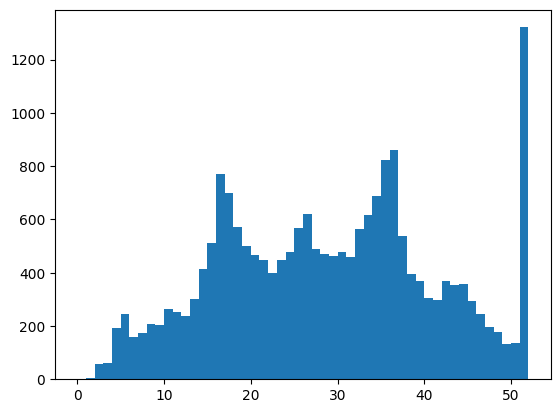

In [6]:
bins = np.arange(0 , house_data["housing_median_age"].max() + 1 , 1)
plt.hist(data = house_data , x = "housing_median_age" , bins = bins);

In [7]:
house_data["housing_median_age"].skew()

0.060330637599136865

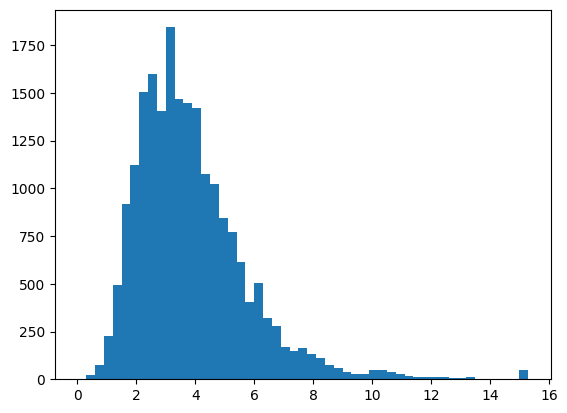

In [8]:
bins = np.arange(0 , house_data["median_income"].max() + 0.3 , 0.3)
plt.hist(data = house_data , x = "median_income" , bins = bins);

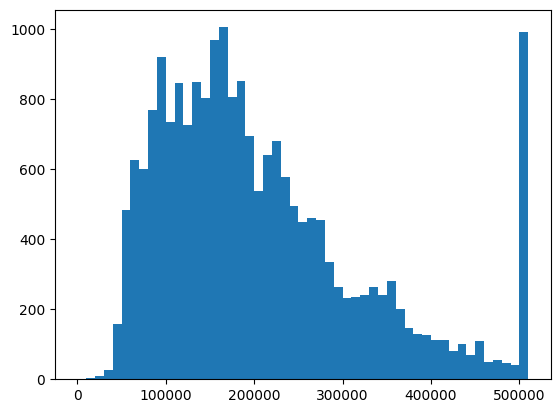

In [9]:
bins = np.arange(0 , house_data["median_house_value"].max() + 10000 , 10000)
plt.hist(data = house_data , x = "median_house_value" , bins = bins);

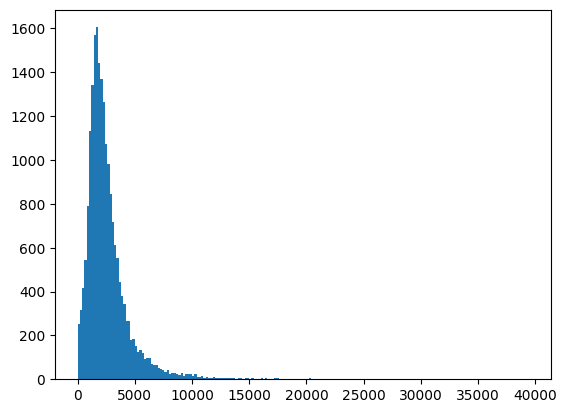

In [10]:
bins = np.arange(0 , house_data["total_rooms"].max() + 200 , 200)
plt.hist(data = house_data , x = "total_rooms" , bins = bins);

In [11]:
house_data["total_rooms"].skew()

4.147343450632158

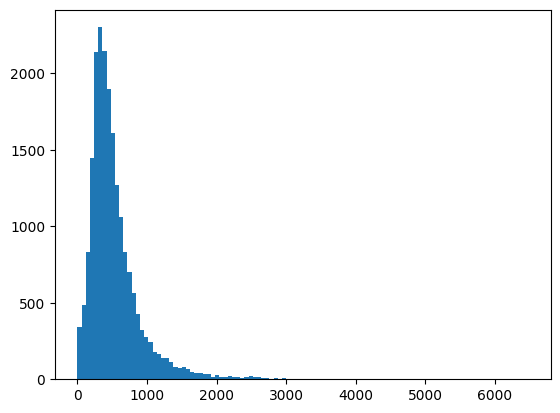

In [12]:
bins = np.arange(0 , house_data["total_bedrooms"].max() + 60 , 60)
plt.hist(data = house_data , x = "total_bedrooms" , bins = bins);

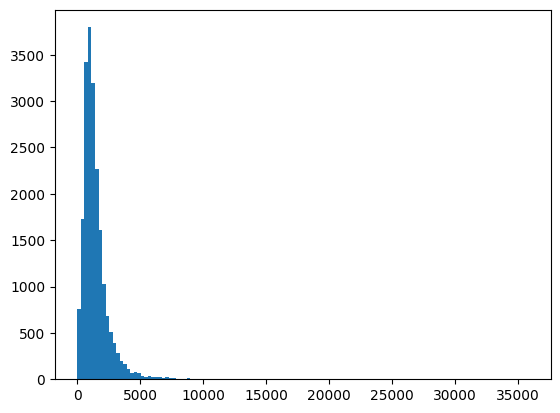

In [13]:
bins = np.arange(0 , house_data["population"].max() + 280 , 280)
plt.hist(data = house_data , x = "population" , bins = bins);

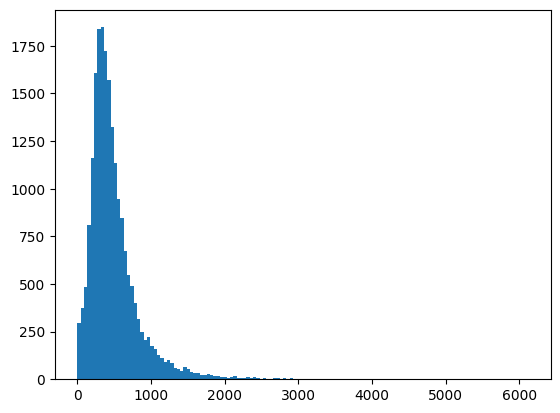

In [14]:
bins = np.arange(0 , house_data["households"].max() + 45 , 45)
plt.hist(data = house_data , x = "households" , bins = bins);

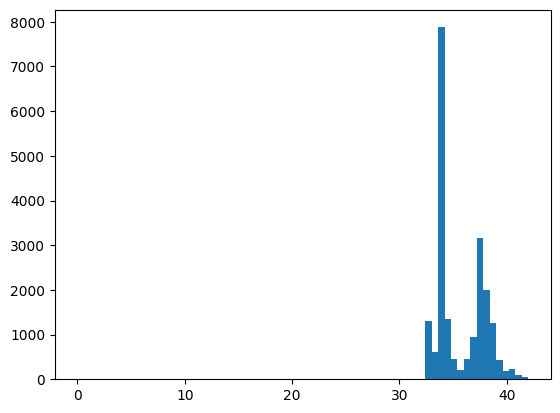

In [15]:
bins = np.arange(0 , house_data["latitude"].max() + 0.6 , 0.6)
plt.hist(data = house_data , x = "latitude" , bins = bins);

# Data Cleaning and Preprocessing

### Hundle Duplicates

In [16]:
dupli = house_data[house_data.duplicated()]
dupli

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


### Hundle Missing Vlaues

In [17]:
print(house_data.isnull().sum() , "\n")
percentage = house_data.isnull().sum().sum() / house_data.shape[0] * 200
print(percentage)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64 

2.005813953488372


##### Number of null rows is very small compare to all rows so we will drop it

In [18]:
house_data = house_data.dropna(axis = 0)
house_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [19]:
house_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

### Feature Engineering

In [20]:
house_data["bedrooms_ratio"] = house_data["total_bedrooms"] / house_data["total_rooms"]
house_data["households_rooms"] = house_data["total_rooms"] / house_data["households"]

# Data Analysis

In [21]:
house_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_ratio,households_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,0.231774,4.761658
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,0.192899,4.931907
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,0.221327,4.797527
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,0.260274,4.294118
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,0.199211,4.970588


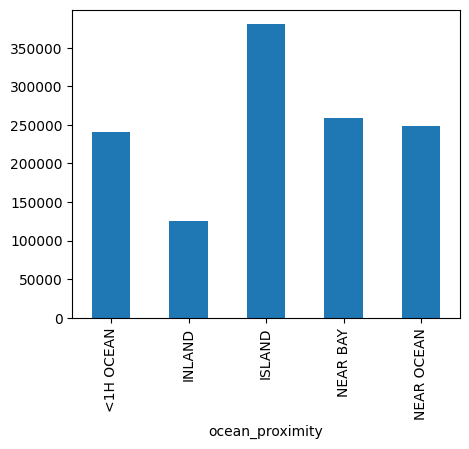

In [22]:
ocean = house_data.groupby(["ocean_proximity"])["median_house_value"].mean()
ocean.plot(kind = "bar" , figsize = [5,4]);

In [23]:
house_data = house_data.join(pd.get_dummies(house_data.ocean_proximity).astype(int)).drop(["ocean_proximity"], axis=1)

In [24]:
house_data.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_ratio,households_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.092657,-0.027307,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.113815,0.106423,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.136089,-0.153031,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.187900,0.133482,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.084238,0.001538,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.035319,-0.071898,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.065087,-0.080165,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.615661,0.325307,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,-0.255880,0.151344,0.257614,-0.484787,0.023525,0.160526,0.140378
bedrooms_ratio,0.092657,-0.113815,0.136089,-0.187900,0.084238,0.035319,0.065087,-0.615661,-0.255880,1.000000,-0.416952,0.078247,-0.114226,0.016246,0.002007,0.040163


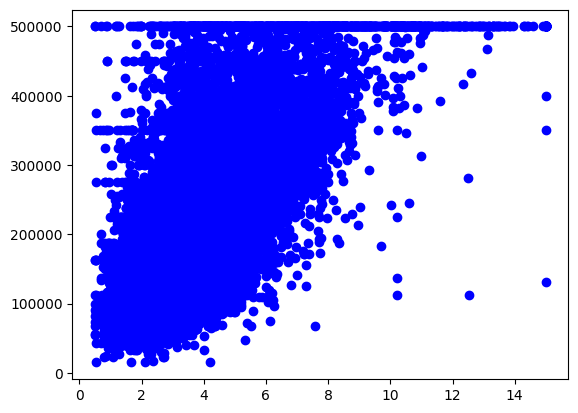

In [25]:
plt.scatter(house_data["median_income"], house_data["median_house_value"], c ="blue");

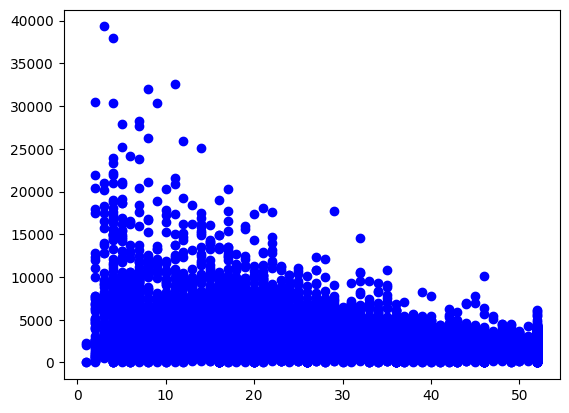

In [26]:
plt.scatter(house_data["housing_median_age"], house_data["total_rooms"], c ="blue");

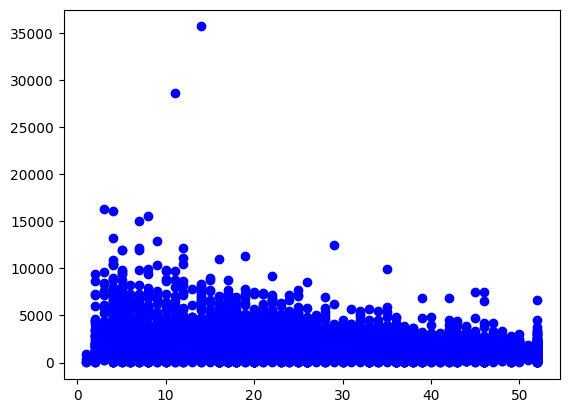

In [27]:
plt.scatter(house_data["housing_median_age"], house_data["population"], c ="blue");

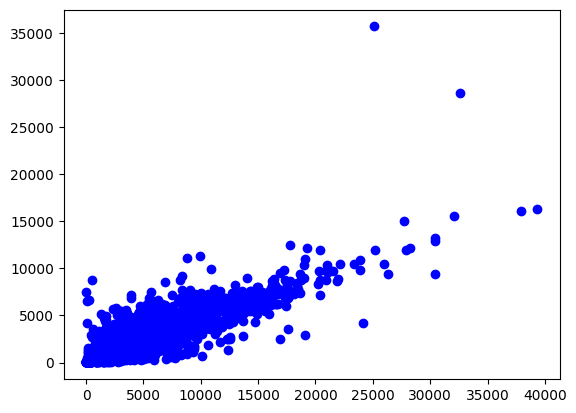

In [28]:
plt.scatter(house_data["total_rooms"], house_data["population"], c ="blue");

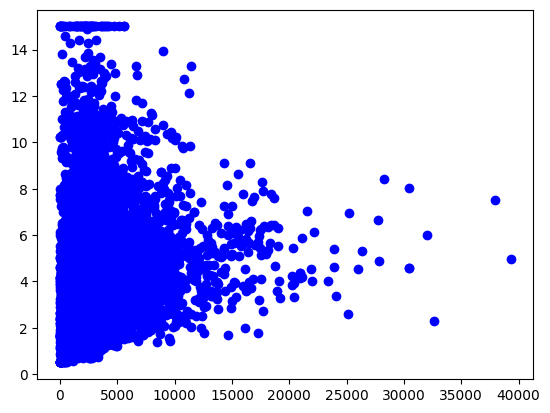

In [29]:
plt.scatter(house_data["total_rooms"], house_data["median_income"], c ="blue");

<Axes: xlabel='longitude', ylabel='latitude'>

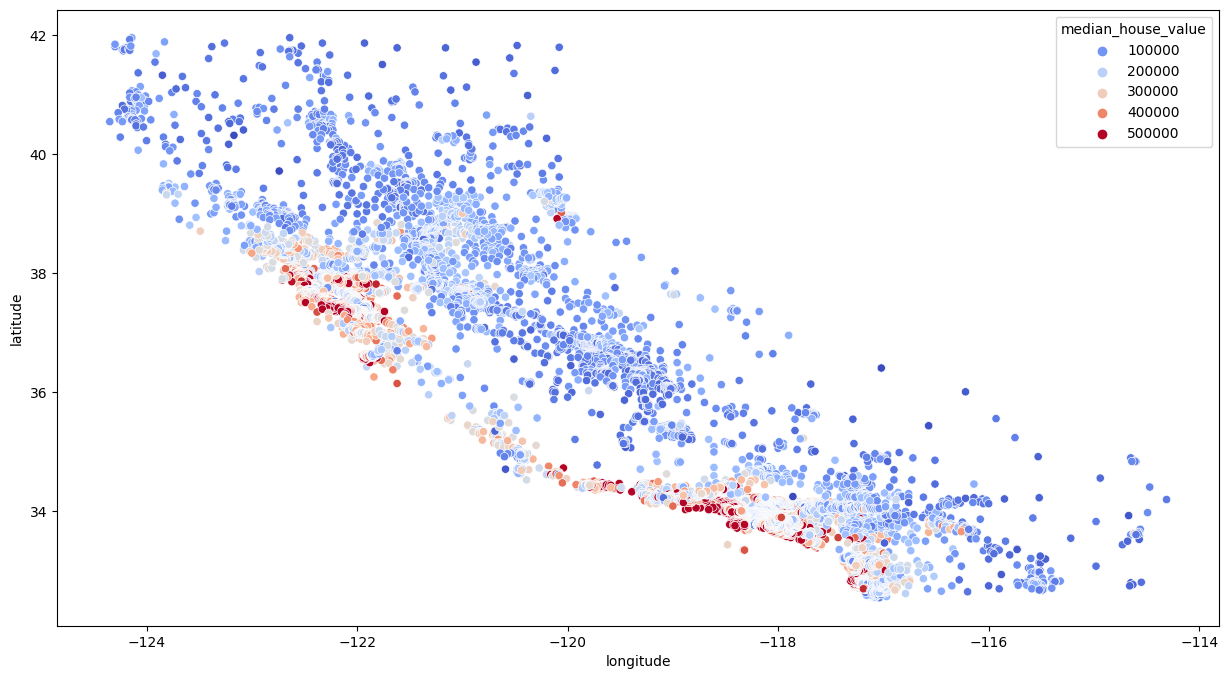

In [30]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = house_data["longitude"] , y = house_data["latitude"] , data = house_data ,hue = "median_house_value" , palette = "coolwarm")

# Build Model

## Prepare Data

### Correlated Data

In [31]:
numeric = house_data.select_dtypes(include = ["float64"])
numeric.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_ratio,households_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.146591,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.155797,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.129516,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.184458,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.172096,6.281853


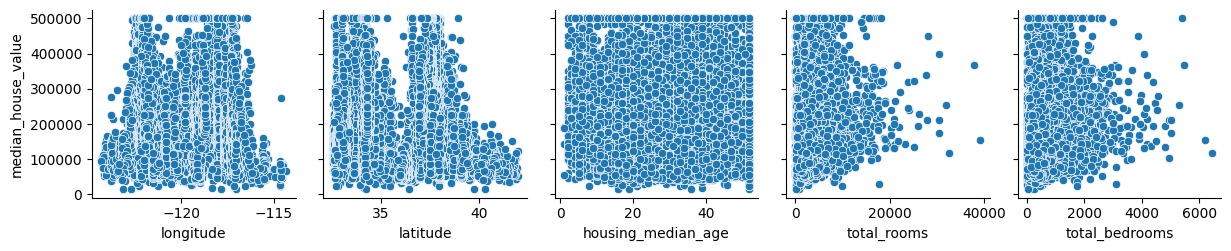

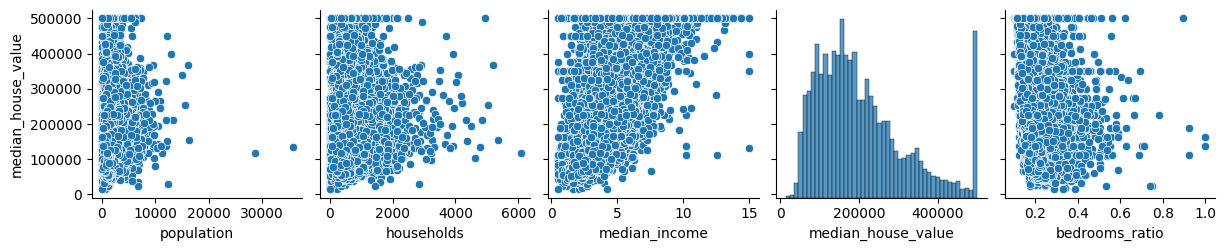

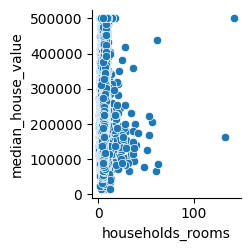

In [32]:
import warnings
warnings.filterwarnings('ignore')
for i in range(0 , len(numeric.columns) , 5):
    sns.pairplot(data = numeric , x_vars = numeric.columns[i:i + 5] , y_vars = ["median_house_value"]);

In [33]:
num_corr = numeric.corr()["median_house_value"].sort_values(ascending = False)
num_corr

median_house_value    1.000000
median_income         0.688355
households_rooms      0.151344
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

In [34]:
house_data = house_data.drop(["households" , "total_bedrooms" , "housing_median_age" , "population"] , axis = 1)

In [35]:
house_data.head()

,longitude,latitude,total_rooms,median_income,median_house_value,bedrooms_ratio,households_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,880.0,8.3252,452600.0,0.146591,6.984127,0,0,0,1,0
1,-122.22,37.86,7099.0,8.3014,358500.0,0.155797,6.238137,0,0,0,1,0
2,-122.24,37.85,1467.0,7.2574,352100.0,0.129516,8.288136,0,0,0,1,0
3,-122.25,37.85,1274.0,5.6431,341300.0,0.184458,5.817352,0,0,0,1,0
4,-122.25,37.85,1627.0,3.8462,342200.0,0.172096,6.281853,0,0,0,1,0


In [36]:
numeric = house_data.select_dtypes(include = ["float64"])

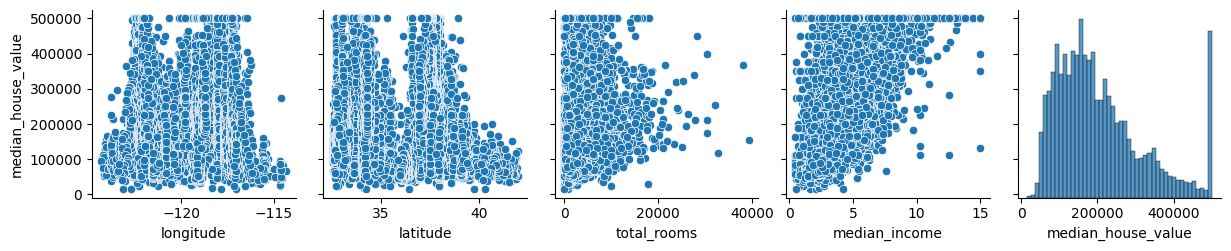

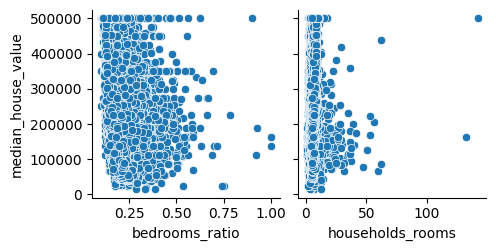

In [37]:
for i in range(0 , len(numeric.columns) , 5):
    sns.pairplot(data = numeric , x_vars = numeric.columns[i:i + 5] , y_vars = ["median_house_value"]);

## Hundle Outliers

In [38]:
out_index = house_data[(house_data["households_rooms"] > 100) | (house_data["median_income"] == 15)].index
out_index

Index([1914, 1979, 5260, 18052], dtype='int64')

In [39]:
house_data = house_data.drop(out_index , axis = 0)

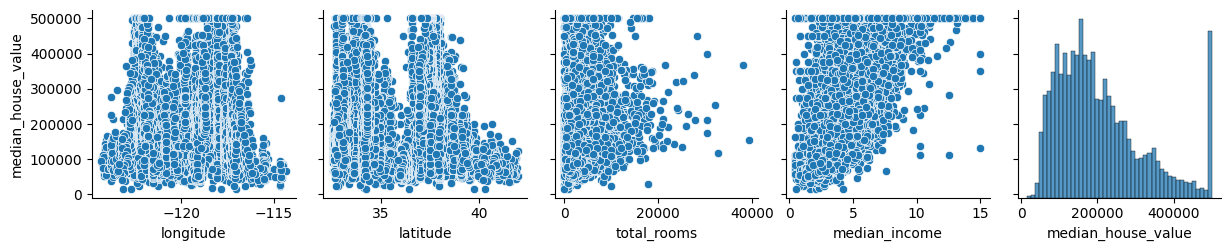

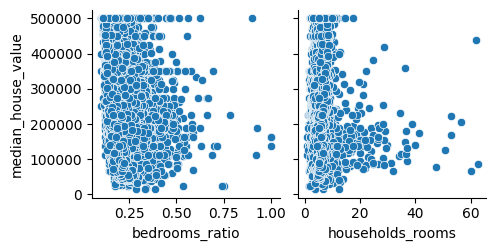

In [40]:
numeric = house_data.select_dtypes(include = ["float64"])
for i in range(0 , len(numeric.columns) , 5):
    sns.pairplot(data = numeric , x_vars = numeric.columns[i:i + 5] , y_vars = ["median_house_value"]);

## Feature Scaling

In [41]:
scaler = MinMaxScaler()
house_data[numeric.columns] = scaler.fit_transform(house_data[numeric.columns])
house_data.head()

,longitude,latitude,total_rooms,median_income,median_house_value,bedrooms_ratio,households_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.211155,0.567481,0.022331,0.539668,0.902266,0.051768,0.099681,0,0,0,1,0
1,0.212151,0.565356,0.180503,0.538027,0.708247,0.061996,0.087566,0,0,0,1,0
2,0.210159,0.564293,0.037260,0.466028,0.695051,0.032796,0.120858,0,0,0,1,0
3,0.209163,0.564293,0.032352,0.354699,0.672783,0.093843,0.080733,0,0,0,1,0
4,0.209163,0.564293,0.041330,0.230776,0.674638,0.080107,0.088276,0,0,0,1,0


## Data Spliting

In [42]:
y = house_data['median_house_value']  
X = house_data.drop('median_house_value', axis=1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preformance Metrics

In [43]:
from sklearn.metrics import r2_score

def performance(y_true , y_predict):
    score = r2_score(y_true , y_predict)
    
    return score

## Learning Curves

In [44]:
from sklearn.model_selection import learning_curve 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import ShuffleSplit, train_test_split

def draw_learning_curves(X, y, estimator, num_trainings):
    cv1 = ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv1, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings),scoring = 'r2')
    
    print("train size :\n",train_sizes)
    print()
    print(train_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    print("train score mean:\n",train_scores_mean)
    print()
    #train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    #test_scores_std = np.std(test_scores, axis=1)

    plt.grid();

    plt.title("Learning Curves");
    plt.xlabel("Training examples");
    plt.ylabel("Score");

    plt.plot(train_sizes,train_scores_mean, 'o-', color="g",
             label="Training score");
    plt.plot(train_sizes,test_scores_mean, 'o-', color="y",
             label="Cross-validation score");
    plt.legend(loc="best");

train size :
 [ 1634  3268  4902  6537  8171  9805 11440 13074 14708 16343]

[[0.33629918 0.29401075 0.33099449 0.28833943 0.32708573 0.32568034
  0.34497512 0.32480715 0.3180174  0.32427082]
 [0.30164727 0.28885165 0.3094994  0.28141977 0.30240788 0.31006557
  0.32797594 0.31952163 0.31164145 0.31177782]
 [0.305239   0.30577702 0.3125347  0.28967674 0.32017161 0.32137121
  0.32180019 0.31452211 0.30636475 0.31159295]
 [0.31753976 0.31002994 0.31435348 0.29162836 0.32137702 0.31202429
  0.31651898 0.31377539 0.30451211 0.30953648]
 [0.3153001  0.30695047 0.31368337 0.29953426 0.3119221  0.31042221
  0.31480926 0.31543659 0.30282318 0.30741345]
 [0.31787347 0.30897913 0.3147327  0.30323507 0.30723296 0.32406719
  0.3131595  0.3143853  0.30110899 0.31395513]
 [0.31550592 0.30648429 0.31751528 0.30331325 0.30345584 0.3211697
  0.31348157 0.31166478 0.30349788 0.31531339]
 [0.31358564 0.30946794 0.31384633 0.30814975 0.30724117 0.31596129
  0.31506113 0.30932483 0.30362436 0.3138882 ]
 [0.

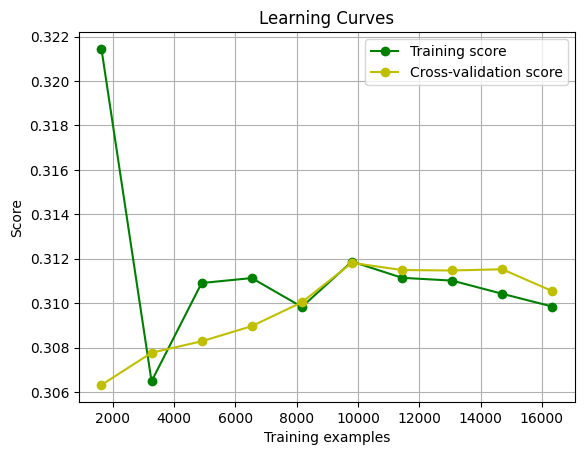

In [45]:
#estimator maxdepth=1
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor(max_depth=1,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 1634  3268  4902  6537  8171  9805 11440 13074 14708 16343]

[[0.57918357 0.55818132 0.59906902 0.57971591 0.59636463 0.6097011
  0.6088346  0.58842401 0.58959657 0.56552285]
 [0.55393162 0.55117913 0.59290761 0.5552804  0.57402668 0.58645333
  0.59650158 0.57067953 0.58042108 0.57865255]
 [0.56898072 0.56119918 0.59213256 0.56447809 0.58067325 0.58253912
  0.58962824 0.56641729 0.57325889 0.57068447]
 [0.57478132 0.56669222 0.58667866 0.56324868 0.5791472  0.5756069
  0.57675744 0.56867781 0.57132266 0.56899696]
 [0.57377869 0.56927643 0.57807377 0.5655406  0.57443786 0.56959737
  0.57572516 0.57545538 0.56098847 0.5663147 ]
 [0.57500273 0.56499407 0.57307842 0.56498726 0.56939648 0.57568266
  0.57135272 0.5733616  0.56712417 0.56811137]
 [0.56996252 0.56303836 0.57362331 0.56766614 0.56383414 0.57620598
  0.57042347 0.57015014 0.56691728 0.57171461]
 [0.57036538 0.56868777 0.57302833 0.57107942 0.56806765 0.57056849
  0.57354045 0.56744757 0.56506858 0.57379798]
 [0.5

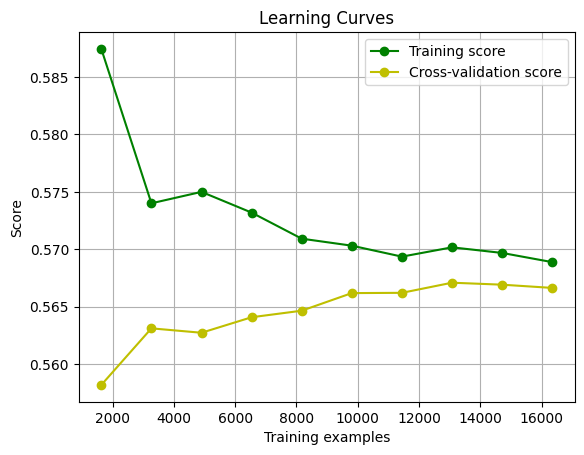

In [46]:
#estimator maxdepth=3
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor(max_depth=3,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 1634  3268  4902  6537  8171  9805 11440 13074 14708 16343]

[[0.71961456 0.6871589  0.75616965 0.7459583  0.71737755 0.74408333
  0.75072556 0.7365243  0.74603267 0.73450116]
 [0.68989878 0.67583131 0.72621091 0.68561889 0.70895898 0.70722288
  0.72289936 0.70116092 0.70737136 0.71592915]
 [0.68723431 0.68376881 0.70287602 0.69319398 0.70576597 0.69285393
  0.71041694 0.69089116 0.70287362 0.69931895]
 [0.69079298 0.67873948 0.69405649 0.68493051 0.69762006 0.69432587
  0.6989053  0.69316721 0.69613835 0.69354789]
 [0.68826591 0.68191058 0.69144851 0.68266551 0.6935853  0.68915147
  0.68698223 0.69686597 0.68707983 0.68836433]
 [0.68794768 0.67999302 0.68479405 0.67600706 0.68612527 0.68944217
  0.68004206 0.69805817 0.6894756  0.69003161]
 [0.67903514 0.67897211 0.68047287 0.67612053 0.67947341 0.68594731
  0.67741547 0.68124388 0.68302418 0.68483336]
 [0.67940491 0.67890603 0.68387096 0.68210425 0.68194275 0.6783401
  0.68643597 0.6794078  0.68220398 0.68053535]
 [0.

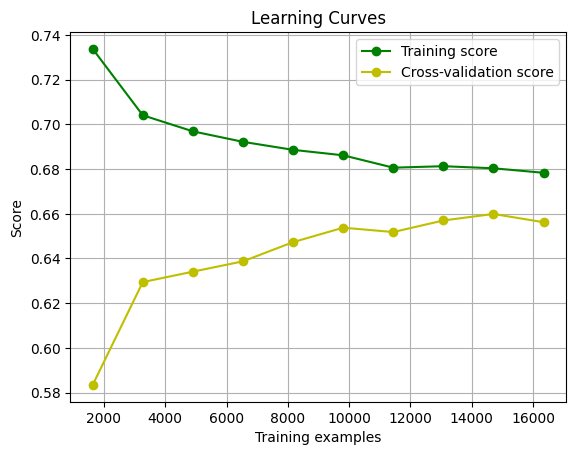

In [47]:
#estimator maxdepth=6
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor(max_depth=6,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 1634  3268  4902  6537  8171  9805 11440 13074 14708 16343]

[[0.86121121 0.8262588  0.89908578 0.90795507 0.83718187 0.88944398
  0.89793472 0.87205761 0.8904103  0.89513091]
 [0.83386867 0.82026942 0.86527699 0.83419708 0.8571531  0.850892
  0.88002878 0.86411696 0.85800091 0.85071779]
 [0.82619957 0.82744901 0.84613456 0.83214128 0.82929811 0.83104656
  0.84393995 0.84535952 0.84141602 0.8261217 ]
 [0.81886322 0.82134931 0.83498154 0.81146879 0.82717703 0.8226051
  0.83611569 0.82736648 0.82877786 0.81434906]
 [0.81335326 0.81538229 0.82047896 0.81605809 0.82471764 0.80947424
  0.81307248 0.82068553 0.81822155 0.80813904]
 [0.81294886 0.81780302 0.81721017 0.80885533 0.81388079 0.81250036
  0.80958052 0.82822878 0.81529477 0.80773014]
 [0.80350935 0.81692232 0.81196159 0.80169926 0.80528714 0.80893957
  0.80100145 0.81701359 0.80410834 0.80118664]
 [0.80460753 0.81456579 0.80773396 0.81385017 0.80967986 0.80119145
  0.81427138 0.80590006 0.79827875 0.79795695]
 [0.80

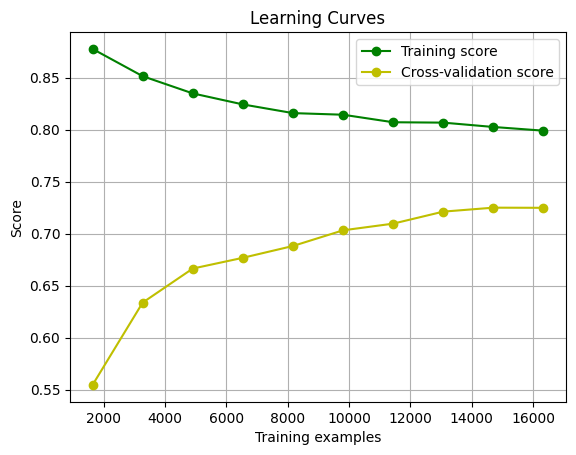

In [48]:
#estimator maxdepth=9
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor(max_depth=9,random_state=0)
draw_learning_curves(X, y, estimator, 10);

train size :
 [ 1634  3268  4902  6537  8171  9805 11440 13074 14708 16343]

[[0.94797456 0.9469957  0.97548546 0.97946418 0.9327361  0.96549222
  0.97307833 0.94980968 0.96817782 0.96881372]
 [0.93985811 0.92948121 0.95597134 0.93890539 0.94497767 0.9411434
  0.95656247 0.94832395 0.94447929 0.94114012]
 [0.92235949 0.92781837 0.93314703 0.93637604 0.92838897 0.91980724
  0.94042443 0.93176619 0.92836589 0.91208741]
 [0.91825474 0.92460364 0.92612078 0.91396478 0.92257182 0.90828709
  0.9267442  0.92113704 0.92012811 0.90683697]
 [0.91279532 0.92209108 0.91133278 0.91541424 0.92046751 0.89545537
  0.90784905 0.90873205 0.90843749 0.90473572]
 [0.90964823 0.91239687 0.90922335 0.90984535 0.90726331 0.90261224
  0.90720865 0.91407627 0.90646493 0.9004336 ]
 [0.89821621 0.90687377 0.90503463 0.89772117 0.90313428 0.89624508
  0.90042288 0.90247749 0.89536742 0.89515225]
 [0.89514467 0.91098506 0.89868785 0.90794597 0.90010807 0.89931416
  0.90532249 0.89406909 0.890278   0.89216973]
 [0.

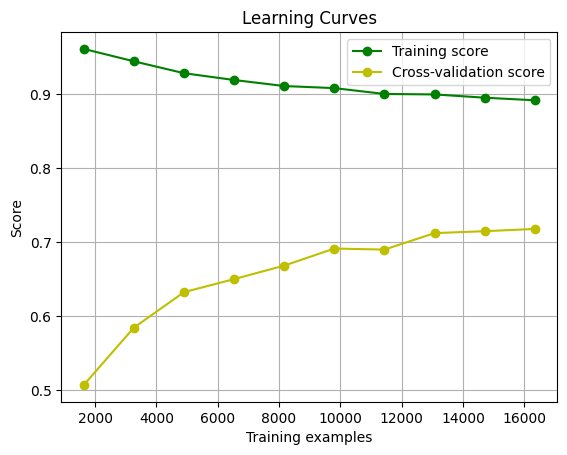

In [49]:
#estimator maxdepth=12
from sklearn.tree import DecisionTreeRegressor
estimator=DecisionTreeRegressor(max_depth=12,random_state=0)
draw_learning_curves(X, y, estimator, 10);

## Complexity

In [50]:
import sklearn.model_selection as curves
def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv1 = ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)
    
    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv1, scoring = 'r2')
    #print("train_scores =\n",train_scores)
    #print("test_scores =\n",test_scores)
    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(5, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    
    
    # Visual aesthetics
    plt.legend(loc = 'best')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')

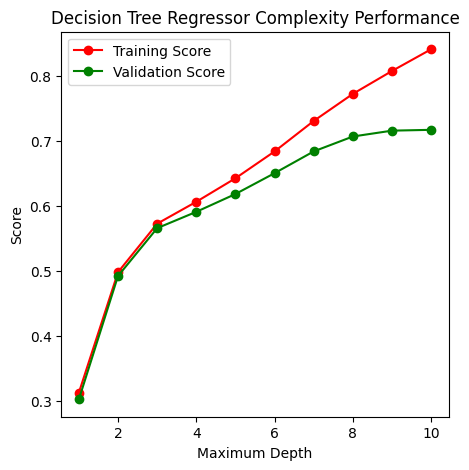

In [51]:
ModelComplexity(X_train, y_train)

## GridSearch

In [52]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X , y):
    
    cv_sets = ShuffleSplit(n_splits = 5 , random_state = 0 , test_size = 0.2 , train_size = None)
    
    regressor = DecisionTreeRegressor(random_state=0)

    params = {"max_depth" : [20,21,22,24] , 'min_samples_leaf':[12,13,14,16,18],'min_samples_split':[2,6,8,10]}
    
    scoring = make_scorer(performance)
    
    grid = GridSearchCV(estimator=regressor, param_grid= params, scoring=scoring,cv=cv_sets)
    
    grid = grid.fit(X, y)
    
    return grid.best_estimator_

In [53]:
reg = fit_model(X_train , y_train)
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))
print("Parameter 'min_samples_leaf' is {} for the optimal model.".format(reg.get_params()['min_samples_leaf']))
print("Parameter 'min_samples_split' is {} for the optimal model.".format(reg.get_params()['min_samples_split']))

Parameter 'max_depth' is 21 for the optimal model.
Parameter 'min_samples_leaf' is 13 for the optimal model.
Parameter 'min_samples_split' is 2 for the optimal model.


In [54]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=21, min_samples_leaf=13, random_state=0)

# Model Evaluation

In [55]:
train_predict = reg.predict(X_train)
test_predict = reg.predict(X_test)

train_score = performance(y_train , train_predict)
test_score = performance(y_test , test_predict)

print("The Train Score Is : " , train_score)
print("The Test Score Is : " , test_score)

The Train Score Is :  0.8489014757774229
The Test Score Is :  0.7631747557829837
